In [482]:
import pandas as pd
import numpy as np

In [483]:
df = pd.read_csv("D:\\anacoda\\DL DATA NOTES\\homeprices_banglore.csv")
df.head()

,area,bedrooms,price
0,1056,2,39.07
1,2600,4,120.00
2,1440,3,62.00
3,1521,3,75.00
4,1200,2,51.00


In [484]:
x = df[["area" ,'bedrooms']]
x.head()

,area,bedrooms
0,1056,2
1,2600,4
2,1440,3
3,1521,3
4,1200,2


In [485]:
y = df[['price']]   # Double Brackets are convert 1D to 2D
y.head()

,price
0,39.07
1,120.00
2,62.00
3,75.00
4,51.00


##  MinMaxScaler

####  It is used to convert the data in between the 0 and 1

In [486]:
from sklearn import preprocessing

In [487]:
sx = preprocessing.MinMaxScaler()
sy = preprocessing.MinMaxScaler()

In [488]:
scaled_x = sx.fit_transform(x)

In [489]:
scaled_x

array([[0.08827586, 0.25      ],
       [0.62068966, 0.75      ],
       [0.22068966, 0.5       ],
       [0.24862069, 0.5       ],
       [0.13793103, 0.25      ],
       [0.12758621, 0.25      ],
       [0.6662069 , 0.75      ],
       [0.86206897, 0.75      ],
       [0.17586207, 0.5       ],
       [1.        , 1.        ],
       [0.34482759, 0.5       ],
       [0.68448276, 0.75      ],
       [0.06896552, 0.25      ],
       [0.10344828, 0.25      ],
       [0.5       , 0.5       ],
       [0.12931034, 0.25      ],
       [0.13103448, 0.5       ],
       [0.25517241, 0.5       ],
       [0.67931034, 0.5       ],
       [0.        , 0.        ]])

In [490]:
scaled_y = sy.fit_transform(y)
scaled_y

array([[0.05237037],
       [0.65185185],
       [0.22222222],
       [0.31851852],
       [0.14074074],
       [0.04444444],
       [0.76296296],
       [0.91111111],
       [0.13333333],
       [1.        ],
       [0.37037037],
       [0.8       ],
       [0.04444444],
       [0.05925926],
       [0.51111111],
       [0.07407407],
       [0.11851852],
       [0.20740741],
       [0.51851852],
       [0.        ]])

In [491]:
x.shape[0]   # 0 is denoted as rows

20

In [492]:
x.shape[1]   # 1 is denoted as no of columns

2

#### Transpose

In [493]:
scaled_x.T

array([[0.08827586, 0.62068966, 0.22068966, 0.24862069, 0.13793103,
        0.12758621, 0.6662069 , 0.86206897, 0.17586207, 1.        ,
        0.34482759, 0.68448276, 0.06896552, 0.10344828, 0.5       ,
        0.12931034, 0.13103448, 0.25517241, 0.67931034, 0.        ],
       [0.25      , 0.75      , 0.5       , 0.5       , 0.25      ,
        0.25      , 0.75      , 0.75      , 0.5       , 1.        ,
        0.5       , 0.75      , 0.25      , 0.25      , 0.5       ,
        0.25      , 0.5       , 0.5       , 0.5       , 0.        ]])

#  Batch Gradient Descent

In [494]:
def batch_gradient_descent(x, y_true, epochs, learning_rate = 0.01):

    # if we have so many weights then we got so much code but the below process is used to easy
    
    number_of_features = x.shape[1]
    
    w = np.ones(shape=(number_of_features)) 
    
    b = 0
    
    n = x.shape[0]   # no of Rows
    # or  
    n = len(x)
    
    cost_list = []
    epoch_list = []
    
    for i in range(epochs): 
        
        y_predicted = np.dot(w, scaled_x.T) + b

#         w_grad = -(2/n)*(X.T.dot(y_true-y_predicted))
        w_grad = -(2/n)*np.dot(scaled_x.T , (y_true - y_predicted))  # T is represt as Transpose
        b_grad = -(2/n)*np.sum(y_true-y_predicted)
        
        
        w = w - learning_rate * w_grad
        b = b - learning_rate * b_grad 
        
        cost = np.mean(np.square(y_true-y_predicted)) # MSE (Mean Squared Error)
        
    
        cost_list.append(cost)
        epoch_list.append(i)
        
    return w, b, cost, cost_list, epoch_list

w, b, cost, cost_list, epoch_list = batch_gradient_descent(scaled_x,scaled_y.reshape(scaled_y.shape[0],),500)
w, b, cost



(array([0.70712464, 0.67456527]), -0.23034857438407427, 0.0068641890429808105)

In [495]:
import matplotlib.pyplot as plt

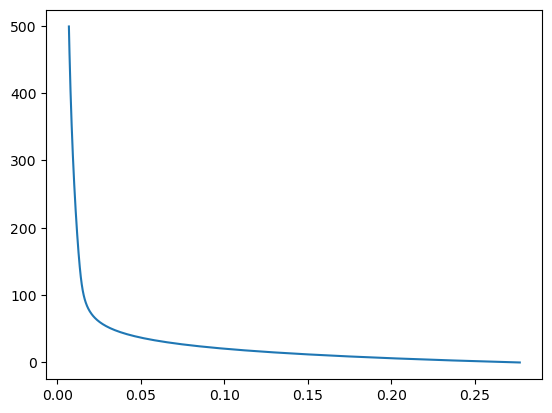

In [496]:
plt.plot(cost_list , epoch_list)

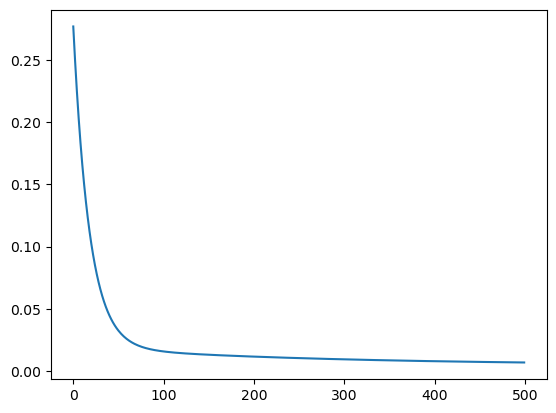

In [497]:
plt.plot(epoch_list , cost_list)

## Predection 

In [498]:
def predection(area, bedrooms , w , b):
    scaled_x = sx.transform([[area ,bedrooms]] ) [0]   # [0] is used to decrease the single Dimension
    
    scaled_price = w[0]*scaled_x[0] + w[1]*scaled_x[1] + b
    
    return sy.inverse_transform ([[scaled_price]])  [0][0]  # [0][0] it is decrease double Dimension

In [499]:
sy.inverse_transform ([[1 , 0.5 ,0 ]])   # max , mid , min values ; Thats why we are using Inverse Transform

array([[167. ,  99.5,  32. ]])

In [500]:
predection(2600,4,w,b)

D:\anacoda\ANACONDA\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


128.45484403267596